# **Import Libraries and modules**

Let us try out different architectures and see how does the accuracy and the number of parameters vary.

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


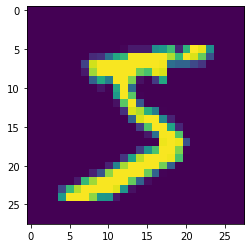

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 19s 314us/step - loss: 0.1998 - acc: 0.9434
Epoch 2/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0746 - acc: 0.9779
Epoch 3/10
60000/60000 [==============================] - 10s 169us/step - loss: 0.0572 - acc: 0.9820
Epoch 4/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0436 - acc: 0.9865
Epoch 5/10
60000/60000 [==============================] - 10s 170us/step - loss: 0.0357 - acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0266 - acc: 0.9919
Epoch 7/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0212 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.0173 - acc: 0.9941
Epoch 9/10
60000/60000 [==============================] - 11s 178us/step - loss: 0.0141 - acc: 0.9955
Epoch 10/10
60000/60000 [==============================] - 11s 180us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.09145909801976304, 0.9804]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.41274849e-19 2.23989446e-19 1.70903568e-14 3.40464048e-08
  2.46871731e-21 1.09654677e-17 5.65894324e-32 1.00000000e+00
  5.86320187e-15 3.53171048e-10]
 [8.83072424e-13 8.59769395e-13 1.00000000e+00 1.10164412e-11
  7.19882365e-25 4.39309674e-14 7.97276795e-13 1.44374919e-25
  3.70971288e-16 1.01458775e-19]
 [3.14744453e-10 9.99917030e-01 2.96914834e-07 1.99832637e-10
  8.18324115e-05 1.70038617e-09 2.81538376e-10 3.24753984e-07
  6.52064045e-07 3.71960462e-10]
 [1.00000000e+00 2.74026196e-21 1.25762609e-10 1.66933266e-16
  8.12274156e-18 7.92453668e-14 2.35969889e-11 1.53890672e-15
  7.05456743e-13 1.49603705e-13]
 [7.47005810e-13 5.51613622e-18 8.83898362e-15 8.52173963e-13
  9.99999404e-01 4.40793898e-19 2.12208435e-15 9.20879085e-12
  1.22580543e-10 5.89894910e-07]
 [3.39052332e-12 9.99982119e-01 9.27419830e-09 6.56987867e-11
  1.09082121e-05 2.70265960e-13 3.16264701e-13 6.22718926e-06
  7.04435195e-07 1.18467480e-09]
 [4.96609213e-18 3.44584539e-12 4.86098539e-09 5.25059267e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

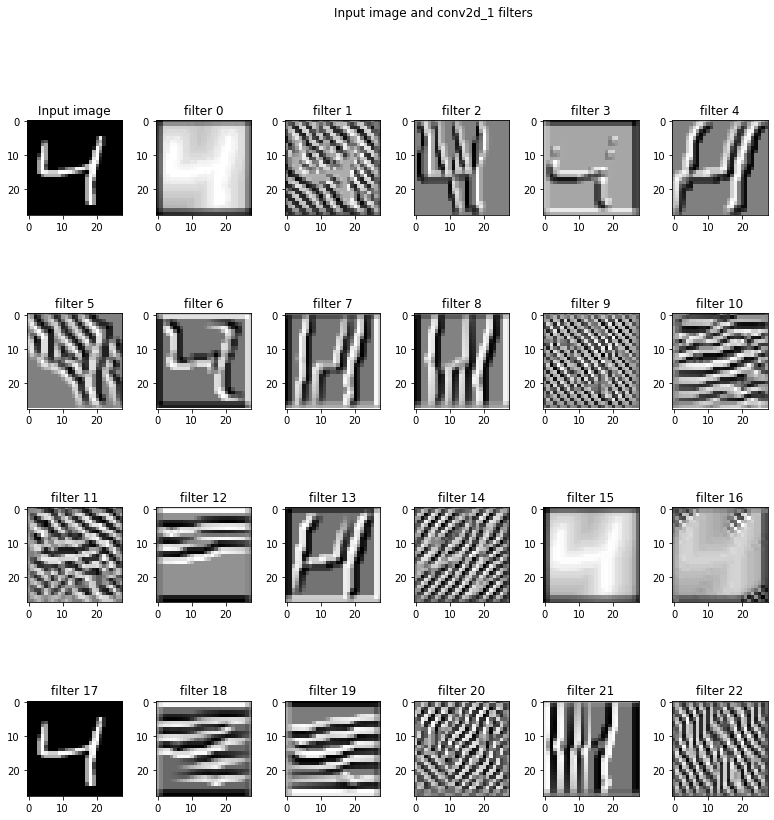

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

## In the above architecture 1 we had 68k parameters and we received an accuracy of 98.04%

#Now  let us try some other architecture (Architecture - 2 )

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(64, 3, 3, activation='relu')) # 24
model.add(Convolution2D(128, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(32, 1, 1, activation='relu')) # 11

model.add(Convolution2D(64, 3, 3, activation='relu')) # 9
model.add(Convolution2D(128, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 128)        

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.1512 - acc: 0.9537
Epoch 2/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0532 - acc: 0.9835
Epoch 3/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0388 - acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 17s 289us/step - loss: 0.0330 - acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 17s 282us/step - loss: 0.0263 - acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0219 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0179 - acc: 0.9944
Epoch 8/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.0165 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 17s 284us/step - loss: 0.0144 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 17s 281us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.036508636198815475, 0.9904]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[8.47334536e-10 2.28307228e-14 2.51166377e-09 1.75490750e-11
  4.33381727e-17 5.68766478e-16 3.30709062e-28 1.00000000e+00
  9.45749047e-15 4.99915498e-10]
 [7.67750663e-13 3.87254707e-11 1.00000000e+00 2.62143049e-19
  1.62355735e-14 3.71870257e-20 2.07247039e-10 4.25926418e-23
  9.42831272e-15 8.20125263e-21]
 [2.32509839e-13 9.99999881e-01 1.31440192e-08 9.97809826e-14
  1.21578609e-07 1.49807877e-09 7.43601968e-12 9.03234820e-09
  2.42870377e-11 1.75648454e-11]
 [1.00000000e+00 2.34447776e-14 2.50955290e-12 8.19769901e-18
  3.22835956e-15 5.27742563e-12 8.35278846e-10 5.59036981e-17
  1.24279515e-12 5.52661389e-12]
 [3.46117170e-16 2.11530588e-14 7.58689437e-19 1.28877516e-23
  1.00000000e+00 1.31377902e-14 3.96996970e-13 4.07115136e-17
  7.09061282e-13 4.35674656e-11]
 [5.90629298e-14 9.99999762e-01 1.38098013e-08 6.16176320e-15
  8.82971705e-08 3.49394260e-13 4.31709959e-14 9.95824010e-08
  1.37522146e-11 1.19287080e-11]
 [3.30491287e-18 6.97788724e-13 1.24286965e-14 1.08670274e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

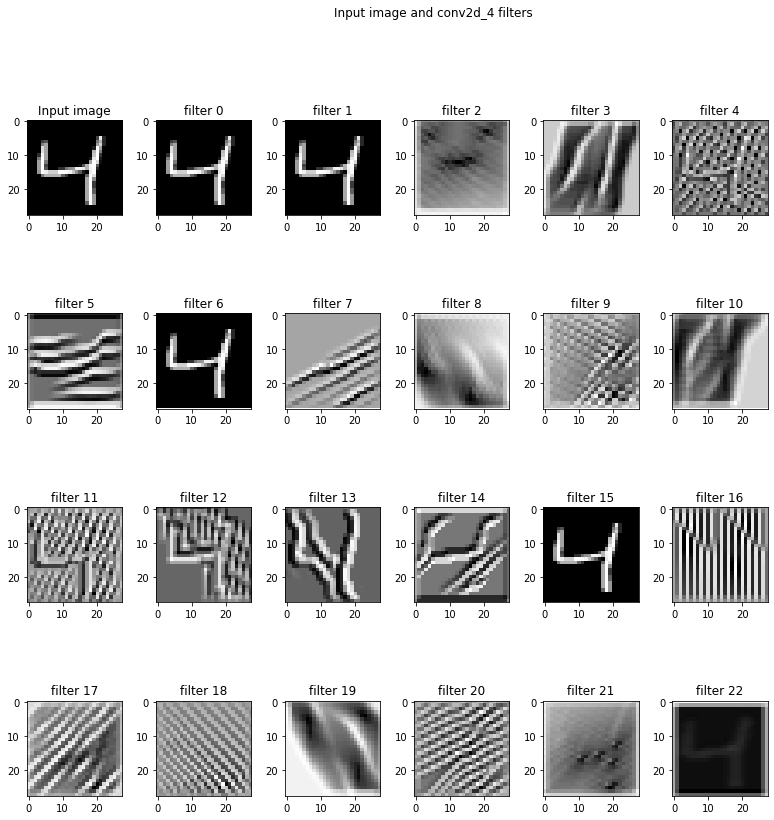

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

# In the above architecture 2 we had 195,352 parameters and we received an accuracy of 99.04%

## Let us try another architecture (Architecture - 3)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 20)        1820      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 20)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 10)        210       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 9, 9, 10)          910       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 7, 7, 20)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.2017 - acc: 0.9386
Epoch 2/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.0755 - acc: 0.9772
Epoch 3/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0561 - acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.0475 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.0406 - acc: 0.9876
Epoch 6/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.0360 - acc: 0.9887
Epoch 7/10
60000/60000 [==============================] - 17s 286us/step - loss: 0.0318 - acc: 0.9904
Epoch 8/10
60000/60000 [==============================] - 17s 285us/step - loss: 0.0295 - acc: 0.9907
Epoch 9/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.0259 - acc: 0.9915
Epoch 10/10
60000/60000 [==============================] - 17s 283us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.036666996561639825, 0.9894]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.13286908e-13 3.56766061e-10 9.45835268e-08 1.26002135e-07
  2.65612662e-12 1.12502993e-10 4.17277480e-22 9.99999762e-01
  1.72883804e-10 1.12958736e-08]
 [1.42586591e-08 2.60259498e-07 9.99999285e-01 1.12014011e-12
  9.59093582e-10 5.70650586e-15 4.69764558e-07 1.37228228e-13
  2.18743593e-10 2.89192612e-16]
 [6.04374745e-11 9.99869943e-01 1.34106892e-06 1.40423351e-09
  1.02792146e-04 1.67642811e-05 9.61378746e-08 2.73158048e-06
  5.23343988e-06 1.11986287e-06]
 [9.99963403e-01 4.33539313e-14 8.72872761e-08 7.27383487e-10
  1.65135443e-08 2.48735773e-06 3.21839689e-05 1.24039164e-11
  6.76218008e-07 1.16729177e-06]
 [2.36767862e-11 4.97399702e-14 9.28615691e-12 6.04552519e-11
  1.00000000e+00 2.38523123e-13 6.06471730e-12 2.92417110e-12
  5.74540471e-10 1.71784507e-08]
 [3.54544137e-11 9.99982238e-01 5.43435021e-07 2.62706190e-10
  1.39493040e-05 2.93722877e-07 3.79250906e-08 2.12421810e-06
  4.22433686e-07 3.41948493e-07]
 [7.30432679e-15 1.43611096e-08 3.97167802e-12 9.03738889e

# So in above architecture we received an accuracy of 98.94% with 10890 number of parameters.

## Architecture 4 

In [0]:
from keras.layers import Activation
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(20, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`


In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 20)        1820      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 20)        80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 20)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 31s 520us/step - loss: 0.1579 - acc: 0.9517
Epoch 2/10
60000/60000 [==============================] - 29s 476us/step - loss: 0.0489 - acc: 0.9849
Epoch 3/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0390 - acc: 0.9878
Epoch 4/10
60000/60000 [==============================] - 30s 493us/step - loss: 0.0334 - acc: 0.9892
Epoch 5/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.0266 - acc: 0.9916
Epoch 6/10
60000/60000 [==============================] - 29s 486us/step - loss: 0.0252 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 30s 504us/step - loss: 0.0217 - acc: 0.9932
Epoch 8/10
60000/60000 [==============================] - 29s 488us/step - loss: 0.0193 - acc: 0.9937
Epoch 9/10
60000/60000 [==============================] - 30s 494us/step - loss: 0.0188 - acc: 0.9939
Epoch 10/10
60000/60000 [==============================] - 29s 491us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.03762937437078799, 0.9892]


In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

Epoch 1/20
  416/60000 [..............................] - ETA: 28s - loss: 0.0067 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 29s 491us/step - loss: 0.0159 - acc: 0.9946
Epoch 2/20
60000/60000 [==============================] - 30s 494us/step - loss: 0.0142 - acc: 0.9953
Epoch 3/20
60000/60000 [==============================] - 29s 489us/step - loss: 0.0132 - acc: 0.9953
Epoch 4/20
60000/60000 [==============================] - 29s 490us/step - loss: 0.0115 - acc: 0.9962
Epoch 5/20
60000/60000 [==============================] - 29s 482us/step - loss: 0.0105 - acc: 0.9964
Epoch 6/20
60000/60000 [==============================] - 30s 501us/step - loss: 0.0100 - acc: 0.9965
Epoch 7/20
60000/60000 [==============================] - 30s 493us/step - loss: 0.0108 - acc: 0.9965
Epoch 8/20
60000/60000 [==============================] - 31s 519us/step - loss: 0.0094 - acc: 0.9970
Epoch 9/20
60000/60000 [==============================] - 30s 502us/step - loss: 0.0073 - acc: 0.9976
Epoch 10/20
60000/60000 [==============================] - 30s 492us/step - loss: 0.0085 - ac

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[4.63958750e-16 5.19920724e-15 5.98378361e-11 2.41862190e-11
  2.60989799e-25 2.63134655e-21 6.38740700e-22 1.00000000e+00
  4.86502638e-17 1.09672937e-12]
 [2.70560895e-15 2.62780141e-13 1.00000000e+00 1.79106228e-16
  1.73511539e-17 1.84159768e-23 3.90349503e-10 3.24373583e-18
  8.37677341e-20 5.60488432e-19]
 [2.32487345e-11 9.99997497e-01 4.54764865e-10 1.33328446e-10
  5.43478862e-08 6.74908351e-10 2.90011457e-07 9.79093073e-09
  2.08992537e-06 6.02403516e-10]
 [1.00000000e+00 3.04184947e-21 3.52915966e-13 4.10172237e-16
  2.47482162e-18 1.48941105e-14 2.99826719e-10 1.30248508e-16
  9.40578019e-13 2.40510719e-14]
 [2.97406847e-13 9.87624045e-13 1.02940165e-13 2.25760073e-15
  9.99998331e-01 1.42718858e-13 4.96548332e-15 7.25420277e-15
  3.21580251e-09 1.64831101e-06]
 [2.03844081e-10 9.99999642e-01 4.21870539e-09 4.42181578e-12
  3.62340891e-09 6.35095221e-13 4.35462860e-10 2.29375434e-08
  3.01283450e-07 3.77570891e-11]
 [4.36548223e-29 5.29469343e-17 1.29890569e-19 6.02216928e


## In the above architecture we received an accuracy of 98.96% and used 11250 parameters with 20 epochs.


## Architecture - 5

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 22
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 22, 22, 32)        4640      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 32)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, 
          epochs=20, verbose=1, 
          validation_data=(X_test, Y_test), )

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 33s 557us/step - loss: 0.1318 - acc: 0.9599 - val_loss: 0.0684 - val_acc: 0.9791
Epoch 2/20
60000/60000 [==============================] - 31s 514us/step - loss: 0.0461 - acc: 0.9858 - val_loss: 0.0464 - val_acc: 0.9849
Epoch 3/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.0355 - acc: 0.9888 - val_loss: 0.0400 - val_acc: 0.9862
Epoch 4/20
60000/60000 [==============================] - 31s 519us/step - loss: 0.0297 - acc: 0.9908 - val_loss: 0.0239 - val_acc: 0.9920
Epoch 5/20
60000/60000 [==============================] - 32s 536us/step - loss: 0.0247 - acc: 0.9918 - val_loss: 0.0281 - val_acc: 0.9906
Epoch 6/20
60000/60000 [==============================] - 31s 524us/step - loss: 0.0213 - acc: 0.9934 - val_loss: 0.0418 - val_acc: 0.9867
Epoch 7/20
60000/60000 [==============================] - 32s 532us/step - loss: 0.0187 - acc: 0.9941 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.038111929804226244, 0.99]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[5.45611848e-18 1.65653786e-12 1.23251053e-11 4.04851597e-10
  2.10261662e-16 8.31547120e-16 5.33748337e-24 1.00000000e+00
  7.45863001e-17 1.12208029e-12]
 [1.57321967e-09 1.65682865e-12 1.00000000e+00 6.43233253e-12
  1.48696783e-13 9.04036962e-19 1.53854152e-09 6.83005906e-15
  2.26803971e-12 1.30559409e-16]
 [2.08251146e-12 9.99999166e-01 8.31655245e-10 3.36532052e-11
  4.59306676e-07 8.90948915e-09 3.11073589e-09 5.71255896e-08
  3.45270536e-07 5.62196600e-12]
 [9.99999881e-01 6.46281052e-18 3.44646794e-12 8.45258074e-15
  1.25747828e-12 1.33259585e-14 7.15528543e-08 7.54750656e-15
  1.70253980e-12 1.96230721e-09]
 [1.50041563e-16 6.75248776e-17 2.62175325e-17 1.27839374e-17
  1.00000000e+00 1.69113685e-17 3.21731780e-16 2.36674108e-17
  1.00569619e-15 1.35305045e-09]
 [3.39672951e-13 9.99999404e-01 2.28053368e-10 1.72633690e-13
  4.73347882e-07 1.01068057e-10 1.48421154e-11 1.72304951e-07
  1.18638281e-08 7.39417069e-11]
 [8.63242941e-21 5.59373554e-11 6.01592551e-16 4.45212031e

## We received an accuracy of 99.27% in the 16th epoch using 18366 parameters.

# Trying Next Architecture to getter better accuracy under less parameters.

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16,3,3, activation='relu', input_shape=(28,28,1), use_bias = False)) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#13


model.add(Convolution2D(32, 3, 3, activation='relu')) #11
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, 1, activation='relu')) #11
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, 3, 3, activation='relu'))#9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu'))#7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))#3



model.add(Convolution2D(10, 3,3))
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/l

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_124 (Bat (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_110 (Dropout)        (None, 26, 26, 16)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 11, 11, 32)        4640      
_________________________________________________________________
batch_normalization_125 (Bat (None, 11, 11, 32)        128       
_________________________________________________________________
dropout_111 (Dropout)        (None, 11, 11, 32)      

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 267us/step - loss: 0.5288 - acc: 0.8548 - val_loss: 0.1277 - val_acc: 0.9780
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 8s 133us/step - loss: 0.2703 - acc: 0.9165 - val_loss: 0.0905 - val_acc: 0.9844
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 8s 130us/step - loss: 0.2147 - acc: 0.9334 - val_loss: 0.0609 - val_acc: 0.9883
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 8s 127us/step - loss: 0.1854 - acc: 0.9397 - val_loss: 0.0553 - val_acc: 0.9899
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [=====

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.02330707768909633, 0.9939]


# We received an accuracy of 99.40% in the 15th epoch using 10540 trainable  parameters.